In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("./kaggle4th/train.csv") 
test = pd.read_csv("./kaggle4th/test.csv") 
sub = pd.read_csv("./kaggle4th/sample_submission.csv") 

train.shape, test.shape, sub.shape

((26049, 16), (6512, 15), (6512, 2))

In [3]:
import seaborn as sns

<AxesSubplot:xlabel='income', ylabel='count'>

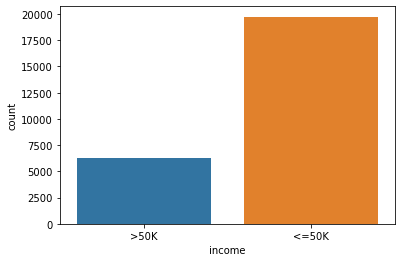

In [4]:
sns.countplot(x="income",data=train)

In [5]:
train['income']

0         >50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
26044    <=50K
26045    <=50K
26046    <=50K
26047    <=50K
26048    <=50K
Name: income, Length: 26049, dtype: object

In [6]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### 데이터 전처리

In [9]:
train.loc[train['income']=='>50K','target'] = 1
train.loc[train['income']=='<=50K','target'] = 0
train['target'] = train.target.astype("int")

In [10]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,target
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,0


In [11]:
test.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


In [12]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'target'],
      dtype='object')

In [13]:
sel = ['id', 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

X = train[sel]
y = train['target']

test_X = test[sel]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify = train.target,
                                                   random_state=42)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19536, 7) (6513, 7) (19536,) (6513,)


### 로지스틱 모델

In [15]:
from sklearn.linear_model import LogisticRegression

In [21]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
pred = model.predict(test_X)

In [17]:
sub.columns

Index(['id', 'prediction'], dtype='object')

In [18]:
print(sub.shape)
print(pred.shape)

(6512, 2)
(6512,)


In [19]:
sub['prediction'] = pred
#sub.to_csv("firstSub4th.csv", index=False)

In [20]:
### 기본 모델 만들기
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

print("학습용 : ", model_rf.score(X_train, y_train))
print("테스트용 : ", model_rf.score(X_test, y_test))

학습용 :  0.9998464373464373
테스트용 :  0.8292645478274221


In [22]:
pred_log = model_log.predict(X_test)
pred_rf = model_rf.predict(X_test)

In [23]:
# 로지스틱 회귀 평가
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_log,
                           target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      4937
        >50K       0.74      0.27      0.39      1576

    accuracy                           0.80      6513
   macro avg       0.77      0.62      0.64      6513
weighted avg       0.79      0.80      0.76      6513



In [25]:
# 앙상블(랜덤 포레스트) 회귀 평가
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf,
                           target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      4937
        >50K       0.72      0.48      0.57      1576

    accuracy                           0.83      6513
   macro avg       0.79      0.71      0.73      6513
weighted avg       0.82      0.83      0.82      6513



In [35]:
### knn 모델 만들기
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

print("학습용 : ", model_knn.score(X_train, y_train))
print("테스트용 : ", model_knn.score(X_test, y_test))

학습용 :  0.8183353808353808
테스트용 :  0.7755258713342545


In [36]:
# knn 회귀 평가
pred_knn = model_knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_knn,
                           target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.79      0.95      0.87      4937
        >50K       0.59      0.23      0.33      1576

    accuracy                           0.78      6513
   macro avg       0.69      0.59      0.60      6513
weighted avg       0.75      0.78      0.74      6513



In [39]:
### GradientBoosting 모델 만들기
from sklearn.ensemble import GradientBoostingClassifier

model_gd = GradientBoostingClassifier()
model_gd.fit(X_train, y_train)

print("학습용 : ", model_gd.score(X_train, y_train))
print("테스트용 : ", model_gd.score(X_test, y_test))

학습용 :  0.8421887796887797
테스트용 :  0.8427759864885613


In [40]:
# GradientBoosting 평가
pred_gd = model_knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_gd,
                           target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.85      0.96      0.90      4937
        >50K       0.80      0.47      0.59      1576

    accuracy                           0.84      6513
   macro avg       0.83      0.71      0.75      6513
weighted avg       0.84      0.84      0.83      6513



In [41]:
y = train['income']
test['income'] = 'blank'

In [42]:
all_dat = pd.concat([train, test], axis=0)
print(all_dat.shape)

(32561, 17)


In [43]:
all_dat.income.value_counts()

<=50K    19744
blank     6512
>50K      6305
Name: income, dtype: int64

In [44]:
all_dat.loc[all_dat['income']=='>50K', 'target'] = 1
all_dat.loc[all_dat['income']=='<=50K', 'target'] = 0
all_dat.loc[all_dat['income']=='blank', 'target'] = 999

all_dat['target'] = all_dat['target'].astype('int')
all_dat.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,target
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,0


In [45]:
all_dat['target'].value_counts()

0      19744
999     6512
1       6305
Name: target, dtype: int64

In [46]:
all_dat.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
en_x = LabelEncoder()
all_dat['workclass_lbl'] = en_x.fit_transform(all_dat['workclass'])
all_dat.head(3)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,target,workclass_lbl
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,1,4
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0,4
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0,4


In [49]:
all_dat['education_lbl'] = en_x.fit_transform(all_dat['education'])
all_dat['marital_status_lbl'] = en_x.fit_transform(all_dat['marital_status'])
all_dat['occupation_lbl'] = en_x.fit_transform(all_dat['occupation'])
all_dat['relationship_lbl'] = en_x.fit_transform(all_dat['relationship'])
all_dat['race_lbl'] = en_x.fit_transform(all_dat['race'])
all_dat['native_country_lbl'] = en_x.fit_transform(all_dat['native_country'])
all_dat.head(3)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,native_country,income,target,workclass_lbl,education_lbl,marital_status_lbl,occupation_lbl,relationship_lbl,race_lbl,native_country_lbl
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,United-States,>50K,1,4,11,2,12,0,4,39
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,United-States,<=50K,0,4,6,4,7,3,4,39
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,United-States,<=50K,0,4,15,4,8,3,4,39


In [50]:
mf_mapping = {"Male": 1, "Female": 2}
all_dat['sex'] = all_dat['sex'].map(mf_mapping)
all_dat.head(3)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,native_country,income,target,workclass_lbl,education_lbl,marital_status_lbl,occupation_lbl,relationship_lbl,race_lbl,native_country_lbl
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,United-States,>50K,1,4,11,2,12,0,4,39
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,United-States,<=50K,0,4,6,4,7,3,4,39
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,United-States,<=50K,0,4,15,4,8,3,4,39


In [51]:
## 필요없는 데이터 열을 확인
## 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country'
sel = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
all_dat_n = all_dat.drop(sel, axis=1)
all_dat_n

,id,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,target,workclass_lbl,education_lbl,marital_status_lbl,occupation_lbl,relationship_lbl,race_lbl,native_country_lbl
0,0,40,168538,9,1,0,0,60,>50K,1,4,11,2,12,0,4,39
1,1,17,101626,5,1,0,0,20,<=50K,0,4,6,4,7,3,4,39
2,2,18,353358,10,1,0,0,16,<=50K,0,4,15,4,8,3,4,39
3,3,21,151158,10,2,0,0,25,<=50K,0,4,15,4,10,3,4,39
4,4,24,122234,10,2,0,0,20,<=50K,0,4,15,4,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,6507,35,61343,13,1,0,0,40,blank,999,4,9,2,12,0,4,39
6508,6508,41,32185,13,1,0,0,40,blank,999,5,9,2,13,0,4,39
6509,6509,39,409189,3,1,0,0,40,blank,999,4,4,2,8,0,4,26
6510,6510,35,180342,9,1,0,0,40,blank,999,4,11,2,3,0,4,39


In [52]:
# 데이터 분리(입력, 출력)
# 자체 평가를 위해서 데이터 나누기
# 모델 만들고 평가

In [54]:
train_n = all_dat_n.loc[(all_dat_n['target']==0) | (all_dat_n['target']==1), : ]
test_n = all_dat_n.loc[all_dat_n['target']==999, : ]

In [55]:
# 각각에 필요없는 컬럼을 삭제
# train(income), test(income, target)

sel_cat = ['income']

train_n = train_n.drop(['income'],axis=1)
test_n = test_n.drop(['income'],axis=1)

In [53]:
X = all_dat_n.drop(['target'],axis=1)
y = all_dat_n['target']

In [57]:
sel = ['age', 'education_num', 'sex']

X_tr_all = train_n[sel]
y_tr_all = train_n['target']
X_test_all = test_n[sel]

X_train, X_test, y_train, y_test = train_test_split(X_tr_all,
                                                   y_tr_all,
                                                   test_size=0.3,
                                                   random_state=77)

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(model.score(X_train, y_train), model.score(X_test, y_test))

0.7960403641548756 0.7901471529110684


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred,
                           target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.81      0.94      0.87      5889
        >50K       0.64      0.35      0.45      1926

    accuracy                           0.79      7815
   macro avg       0.73      0.64      0.66      7815
weighted avg       0.77      0.79      0.77      7815

